In [1]:
#Titanic DATA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
missing_value_percentage=df.isnull().sum()/len(df)*100
print(missing_value_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [8]:
# Age and Cabin has missing value percentage of 19% and 77% respectively, Emabrked has very less missing values

In [9]:
df.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [10]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
#we can drop Ticket and Name coolumsn as they have complete unique
#identifiers and wouldnot support in better model building

In [12]:
df.Cabin.dtype

dtype('O')

In [13]:
df['Cabin'] = df['Cabin'].str.extract('(\w)')

In [14]:
cabins = ['C', 'E', 'G', 'D', 'A', 'B', 'F','T']

def cabincount(x):
    if x in cabins:
        return("Cabin_Avbl")
    else:
        return("Not_Avbl")
    
df["Cabin"] = df.Cabin.apply(cabincount)

<Axes: xlabel='Cabin'>

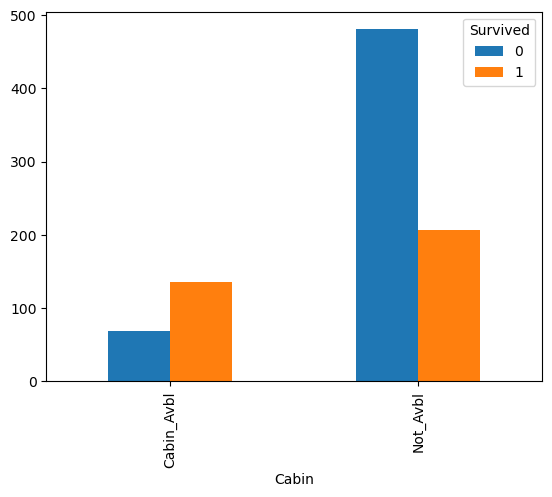

In [15]:
pd.crosstab(df.Cabin, df.Survived).plot(kind = "bar")

In [16]:
#there could be a possible relation between cabin availability and survival

In [17]:
# Family 
df["Family"] = df["SibSp"]+df["Parch"]+1

In [18]:

# Bin the Family...
#1 = Singles
# 2 = Doubles
# 3 = Family
# >3 Large

def family(x):
    if x>3:
        return("Large")
    elif x>2:
        return("Small")
    elif x>1:
        return("Doubles")
    else:
        return("Singles")

In [19]:
df["Family"] = df.Family.apply(family)

In [20]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:

df.Embarked.mode()[0]

'S'

In [22]:
df.loc[df.Embarked.isnull(),"Embarked"]= df.Embarked.mode()[0]

In [23]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
df.loc[df.Age.isnull(),"Age"]= df.Age.mean()

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family         0
dtype: int64

In [26]:
# we have filled the missing values with needful imputtaion techinques.

In [27]:
df.drop_duplicates(inplace=True)
df.reset_index().shape

(891, 14)

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [29]:
df_new=df.drop(['PassengerId' ,'Name','Ticket','SibSp','Parch'],axis=1)

In [30]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family'],
      dtype='object')

In [31]:
df_new

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.000000,7.2500,Not_Avbl,S,Doubles
1,1,1,female,38.000000,71.2833,Cabin_Avbl,C,Doubles
2,1,3,female,26.000000,7.9250,Not_Avbl,S,Singles
3,1,1,female,35.000000,53.1000,Cabin_Avbl,S,Doubles
4,0,3,male,35.000000,8.0500,Not_Avbl,S,Singles
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,Not_Avbl,S,Singles
887,1,1,female,19.000000,30.0000,Cabin_Avbl,S,Singles
888,0,3,female,29.699118,23.4500,Not_Avbl,S,Large
889,1,1,male,26.000000,30.0000,Cabin_Avbl,C,Singles


In [32]:
sex_n= {'male': 1, 'female': 2}
df_new['Sex'] = df_new['Sex'].map(sex_n).astype(int)

In [33]:
cabin_n= {'Cabin_Avbl': 1, 'Not_Avbl': 0}
df_new['Cabin'] = df_new['Cabin'].map(cabin_n).astype(int)

In [34]:
labelencoder = LabelEncoder()
df_new['Family']= labelencoder.fit_transform(df_new['Family'])

In [35]:
Embarked_n = {'S': 1, 'C': 2, 'Q': 3}
df_new['Embarked'] = df_new['Embarked'].map(Embarked_n).astype(int)

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    int64  
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


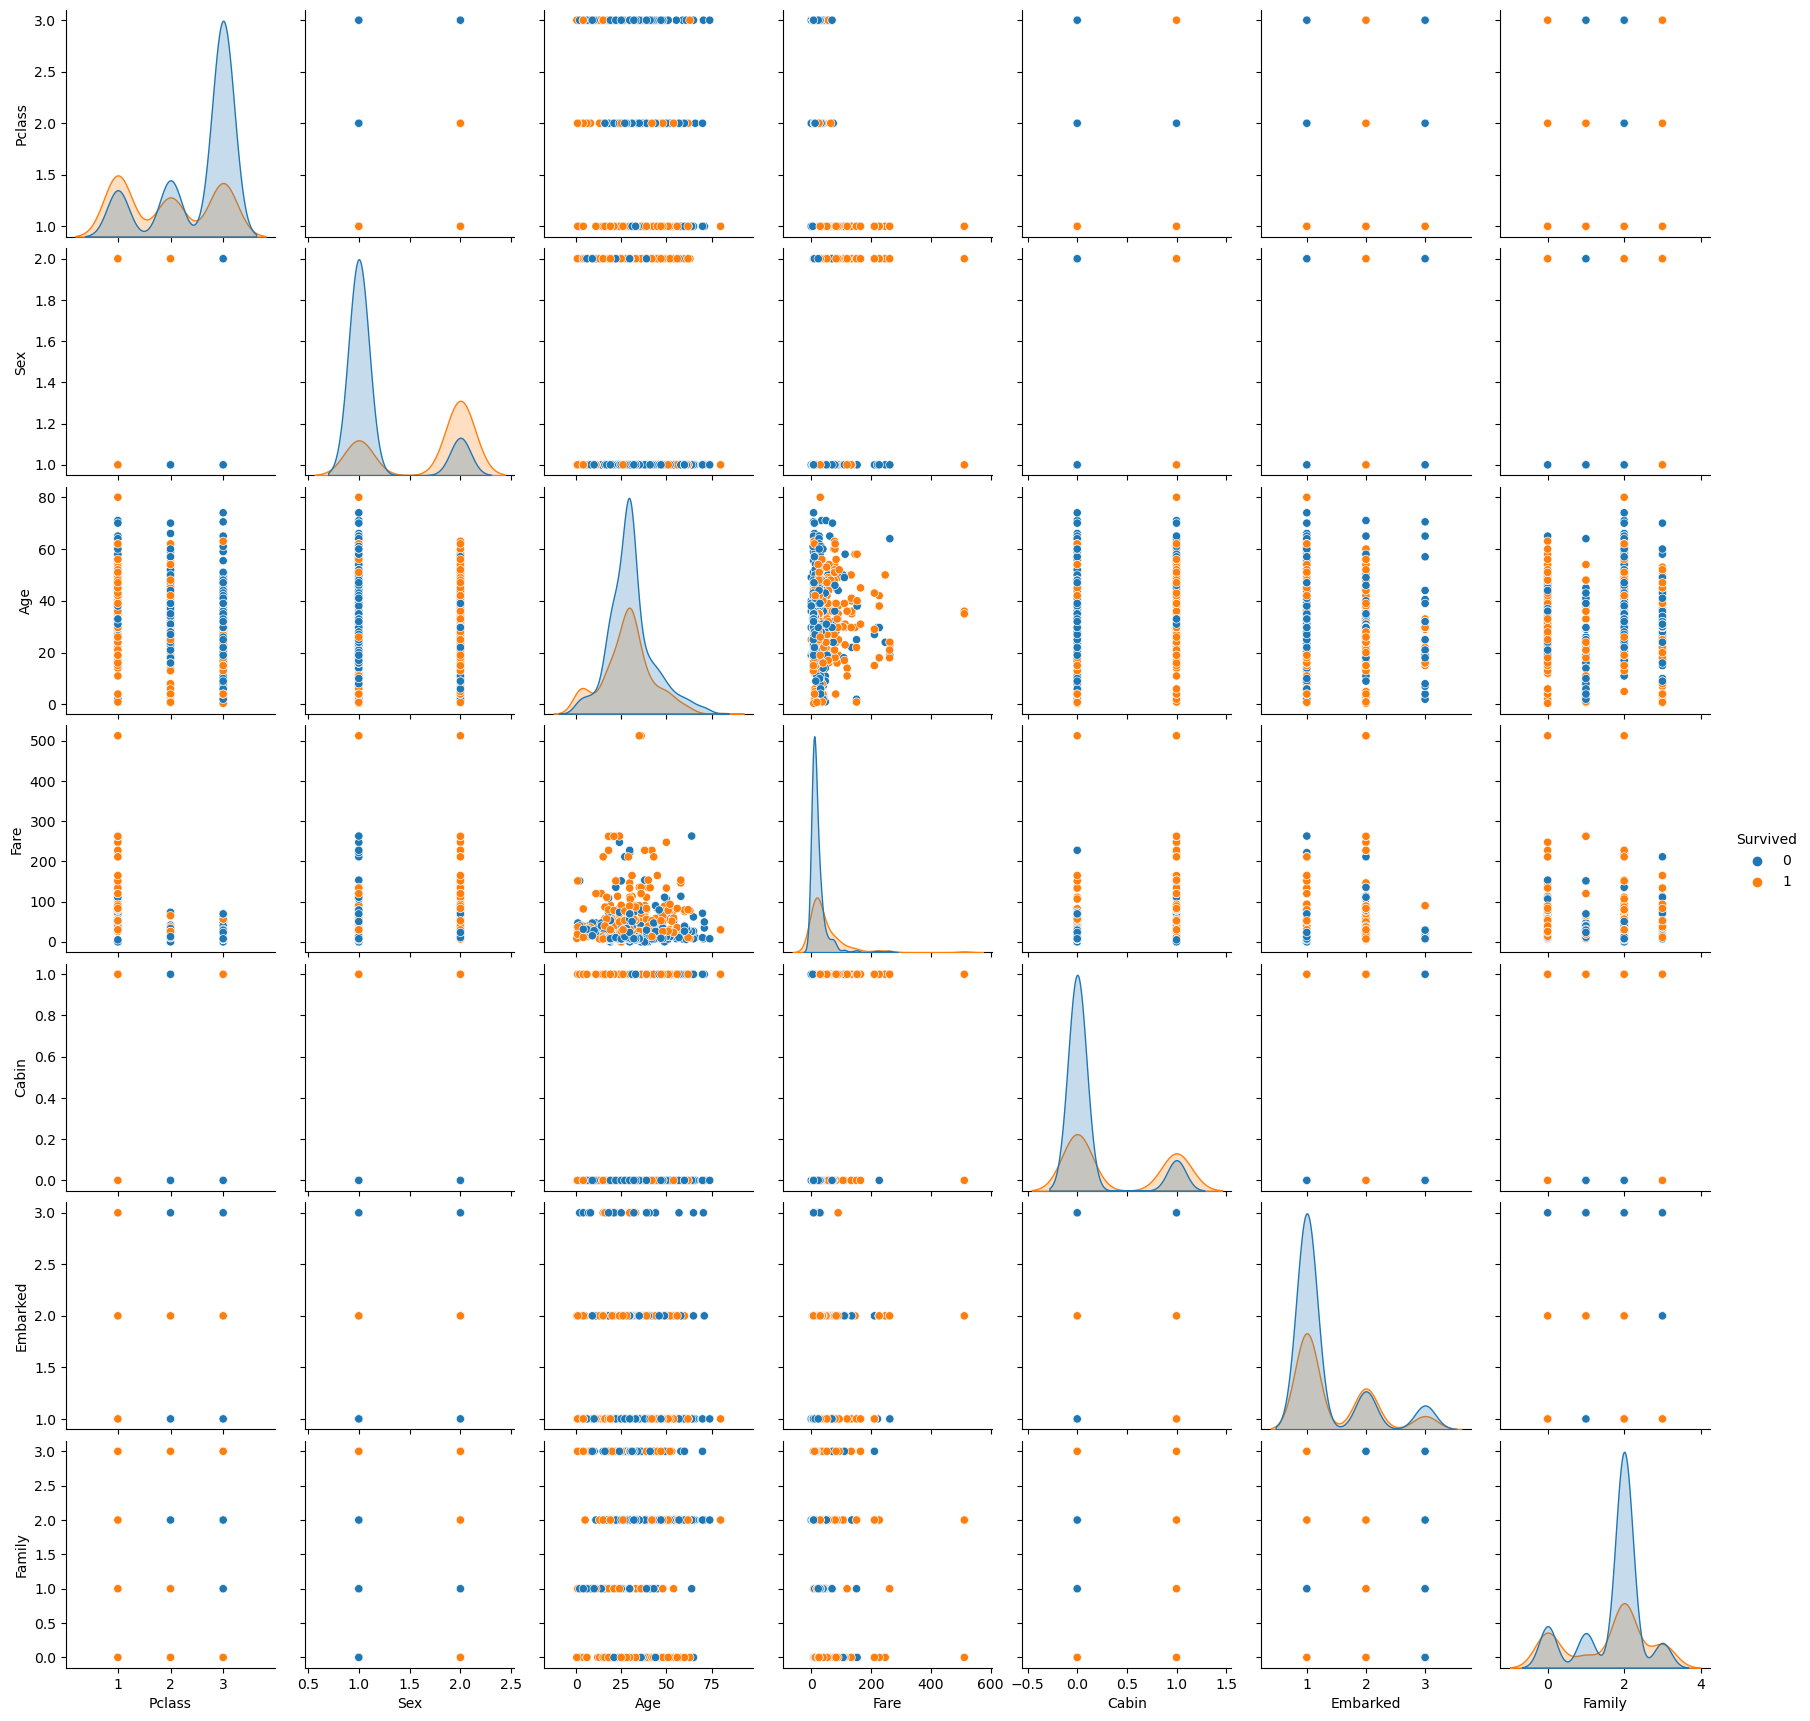

In [37]:
sns.pairplot(df_new, hue='Survived')

In [45]:
# a pair plot to visualise all variables based on target class

<Axes: >

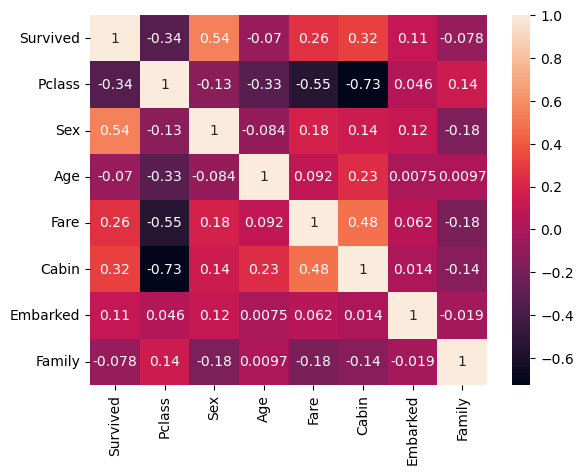

In [38]:

sns.heatmap(df_new.corr(), annot=True)

In [46]:
# the correlation heatmap shows no possible multicolinearity and postive correlation

## Modelling


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [40]:
X = df_new.drop("Survived", axis=1)
y = df_new["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((712, 7), (179, 7), (712,), (179,))

In [41]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test )


### base model -logestic regression 

In [42]:
lr= LogisticRegression(random_state = 10)
lr.fit(X_train, y_train)


LogisticRegression(random_state=10)

In [43]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1])

In [49]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_report = classification_report(y_test, y_pred)


print(lr_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       117
           1       0.76      0.81      0.78        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



In [50]:
y_pred_prob = lr.predict(X_test)

In [51]:
cm=confusion_matrix(y_test,y_pred)

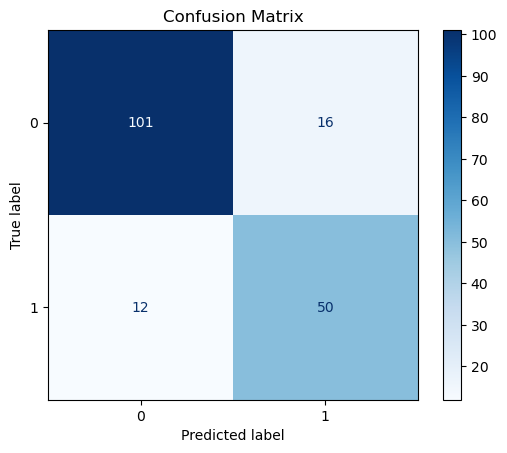

In [52]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### model with tuned parameters - Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
# Create a grid of hyperparameter values
param_grid = { 'n_estimators': [30,50,100],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 5, 15, 30],
    'min_samples_leaf': [1, 3, 5, 10]
}


In [55]:

Rf= RandomForestClassifier()

Rf_grid_search = GridSearchCV(Rf, param_grid, cv=5)

Rf_grid_search.fit(X_train, y_train)

#Best hyperparameters
best_params = Rf_grid_search.best_params_
best_params

{'max_depth': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [56]:

# Create a RandomForestClassifier object with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train,y_train)

# Make predictions on the test data
y_pred_rf = rf_best.predict(X_test)


In [57]:
cm_rf=confusion_matrix(y_test,y_pred_rf)

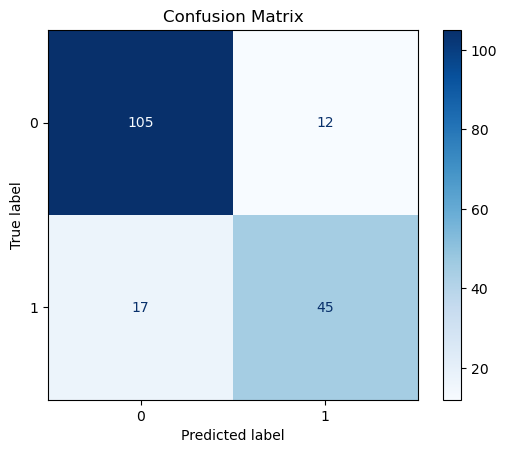

In [59]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=rf_best.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [61]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)


print(rf_report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       117
           1       0.79      0.73      0.76        62

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



### knn_model with tuned parameters

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()  #################

#################
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy',
                       n_jobs=-1)

knn_grid.fit(X_train, y_train)

print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 19} 



In [64]:
knn_classification=KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors'],
                                       metric=knn_grid.best_params_['metric'])

knn_model=knn_classification.fit(X_train,y_train)

y_pred_knn=knn_model.predict(X_test)



In [66]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)


print(knn_report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.83      0.71      0.77        62

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



### base model Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [68]:
decision_tree_model = DecisionTreeClassifier()
scores = cross_val_score(estimator = decision_tree_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'accuracy')
print("Mean accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

Mean accuracy after 10 fold cross validation:  0.77


### building decision tree with tuned parameters

In [69]:

tuned_paramaters = [{ 'criterion': ['entropy', 'gini'],    
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6} 



In [70]:
DT=DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_split= 6)
DT_model = DT.fit(X_train, y_train)

In [71]:
y_pred_dt=DT.predict(X_test)

In [73]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)


print(dt_report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.77      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [74]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression','Random Forest' ,'Decision Tree'],
    'acc_Score': [knn_accuracy,lr_accuracy,rf_accuracy,dt_accuracy]})
models.sort_values(by='acc_Score', ascending=False)

,Model,acc_Score
0,KNN,0.849162
1,Logistic Regression,0.843575
2,Random Forest,0.837989
3,Decision Tree,0.821229


In [ ]:
# the model built with best parameters of Random Forest and knn has good F1 score and accuracy score compared to
# base model of logistic regression and decision tree model..

